In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from optimus import Optimus

C:\Users\argenisleon\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable

    You are using PySparkling of version 2.4.10, but your PySpark is of
    version 2.3.1. Please make sure Spark and PySparkling versions are compatible. 


In [4]:
op= Optimus(master="local", app_name= "optimus", verbose = True)

INFO:optimus:Operative System:Windows
INFO:optimus:Just check that Spark and all necessary environments vars are present...
INFO:optimus:-----
INFO:optimus:SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
INFO:optimus:HADOOP_HOME=C:\opt\hadoop-2.7.7
INFO:optimus:PYSPARK_PYTHON=C:\Users\argenisleon\Anaconda3\python.exe
INFO:optimus:PYSPARK_DRIVER_PYTHON=jupyter
INFO:optimus:PYSPARK_SUBMIT_ARGS=--jars "file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/RedshiftJDBC42-1.2.16.1027.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/mysql-connector-java-8.0.16.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/ojdbc8.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/postgresql-42.2.5.jar" --driver-class-path "C:/Users/argenisleon/Documents/Optimus/optimus/jars/RedshiftJDBC42-1.2.16.1027.jar;C:/Users/argenisleon/Documents/Optimus/optimus/jars/mysql-connector-java-8.0.16.jar;C:/Users/argenisleon/Documents/Optimus/optimus/jars/ojdbc8.jar;C:/User

In [5]:
import pandas as pd
from pyspark.sql.types import *
from datetime import date, datetime
df = op.load.csv("data/Meteorite_Landings.csv").h_repartition()

In [6]:
p.count()

In [13]:
df.table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
Optim'us,28.0,Leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]"
bumbl#ebéé⋅⋅,17.5,Espionage,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","[5.334000110626221,⋅2000.0]"
ironhide&,26.0,Security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]"
Jazz,13.0,First⋅Lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]"
Megatron,None,None,None,5.699999809265137,['Megatron'],None,"[None,⋅5700.0]"
Metroplex_)^$,300.0,Battle⋅Station,8,None,['Metroflex'],None,"[91.44000244140625,⋅None]"


In [4]:
from optimus.bumblebee import Comm

In [26]:
df.cols.range("id")

ValueError: 'missing_columns' must be 'names', 'height(ft)', 'function', 'rank', 'weight(t)', 'japanese name', 'last position', 'attributes', received 'id'

In [47]:
from optimus.profiler.profiler import Profiler
p = Profiler()
p.general_stats(df, "names")

INFO:optimus:Config.ini not found


<class 'list'>
<class 'list'>
Including 'nan' as Null in processing string type column'names'
<class 'list'>
<class 'list'>


INFO:optimus:general_stats() executed in 2.2 sec


{'names': {'min': 'Jazz',
  'max': 'ironhide&',
  'stddev': None,
  'kurtosis': None,
  'mean': None,
  'skewness': None,
  'sum': None,
  'variance': None,
  'zeros': 0,
  'count_na': 0,
  'hist': [{'count': 1.0, 'lower': 0.0, 'upper': 5.0},
   {'count': 3.0, 'lower': 5.0, 'upper': 10.0},
   {'count': 2.0, 'lower': 10.0, 'upper': 15.0},
   {'count': 0.0, 'lower': 15.0, 'upper': 20.0},
   {'count': 0.0, 'lower': 20.0, 'upper': 25.0},
   {'count': 0.0, 'lower': 25.0, 'upper': 30.0},
   {'count': 0.0, 'lower': 30.0, 'upper': 35.0},
   {'count': 0.0, 'lower': 35.0, 'upper': 40.0},
   {'count': 0.0, 'lower': 40.0, 'upper': 45.0},
   {'count': 0.0, 'lower': 45.0, 'upper': 50.0}]}}

In [14]:
%%time
# https://stackoverflow.com/questions/48479106/pyspark-reducebykey-multiple-columns-but-independently
df.name("df")

cols= {"recclass","id"}
# cols=df.cols.names()

query = """SELECT 
            {COLUMNS}, 
            COUNT(*) AS total 
            FROM hola GROUP BY {COLUMNS} GROUPING SETS({COLUMNS})""".format(COLUMNS=', '.join('`{0}`'.format(c) for c in cols))
print(query)
df1 = df.query(query)
df1.show()

SELECT 
            `id`, `recclass`, 
            COUNT(*) AS total 
            FROM hola GROUP BY `id`, `recclass` GROUPING SETS(`id`, `recclass`)
+-----+--------+-----+
|   id|recclass|total|
+-----+--------+-----+
|28995|    null|    1|
|48090|    null|    1|
|51701|    null|    1|
|24273|    null|    1|
|47489|    null|    1|
|46357|    null|    1|
|25265|    null|    1|
|52043|    null|    1|
|44504|    null|    1|
|29038|    null|    1|
|45296|    null|    1|
|12670|    null|    1|
|55496|    null|    1|
|35714|    null|    1|
|48961|    null|    1|
|11016|    null|    1|
|54217|    null|    1|
| 8666|    null|    1|
|46524|    null|    1|
| 3520|    null|    1|
+-----+--------+-----+
only showing top 20 rows

Wall time: 7.21 s


In [66]:
%%time
df1.table_name("df1")


# SELECT 
#     recclass, COUNT(*) over (PARTITION BY recclass) AS c_recclass,
    
query =  "SELECT {COLUMNS},total FROM df1 ORDER BY total DESC LIMIT 10".format(COLUMNS=', '.join('`{0}`'.format(c) for c in cols))  

df1.query(query).table()

recclass 1 (string) nullable,total 2 (bigint) not nullable
L6,8285
H5,7142
L5,4796
H6,4528
H4,4211
LL5,2766
LL6,2043
L4,1253
H4/5,428
CM2,416


Wall time: 10.7 s


In [67]:
%%time
df.cols.frequency("reclat")

Wall time: 10.9 s


{'reclat': [{'value': None, 'count': 7315},
  {'value': 0.0, 'count': 6438},
  {'value': -71.5, 'count': 4761},
  {'value': -84.0, 'count': 3040},
  {'value': -72.0, 'count': 1506},
  {'value': -79.68333, 'count': 1130},
  {'value': -76.71667, 'count': 680},
  {'value': -76.18333, 'count': 539},
  {'value': -84.21667, 'count': 263},
  {'value': -86.36667, 'count': 226}]}

In [1]:
#https://stackoverflow.com/questions/42513332/only-return-top-n-results-for-each-group-in-grouping-sets-query
query = """
select a, b, total
from (
        SELECT 
         recclass, id, total, 
        row_number() over(
            partition by recclass,id 
            order by total desc
        ) as rn
        FROM(
        select recclass, id, count(*) as total
        from df
        group by recclass,id GROUPING SETS(recclass,id)
        )
    ) s
) s
where rn <= 3
"""
query = """
    select recclass, id, count(*) as total
        from df
    group by recclass,id GROUPING SETS(recclass,id)
        """

# df.query("""SELECT recclass, id, COUNT(*) AS count
#              FROM df GROUP BY recclass, id GROUPING SETS(recclass, id)"""
         
df.query(query).show()

NameError: name 'df' is not defined

In [14]:
from operator import add

counts = (df.rdd
   .flatMap(lambda x: x.asDict().items())
   .map(lambda x: (x, 1))
   .reduceByKey(add))

counts.toLocalIterator():
    print(x)

SyntaxError: invalid syntax (<ipython-input-14-865b1138464d>, line 8)

In [101]:
df1.select(F.collect_list(F.create_map(F.col("recclass"), F.col("count")))).show()

+----------------------------------+
|collect_list(map(recclass, count))|
+----------------------------------+
|              [[L6 -> 8285], [H...|
+----------------------------------+



In [21]:
%%time
# https://stackoverflow.com/questions/7278905/efficiently-find-top-n-values-from-multiple-columns-independently-in-oracle
df.table_name("tmp")
query = """
SELECT DISTINCT {COL_NAME},c_fn FROM (
SELECT 
    {COL_NAME}, COUNT(*) over (PARTITION BY {COL_NAME}) AS c_fn 
from tmp 
) ORDER BY c_fn DESC LIMIT 10

""".format(COL_NAME="recclass")
print(query)

df.query(query).show()

AttributeError: 'DataFrame' object has no attribute 'table_name'

In [88]:
%%time
# https://stackoverflow.com/questions/7278905/efficiently-find-top-n-values-from-multiple-columns-independently-in-oracle
df.table_name("tmp")
query = """
SELECT 
    recclass, COUNT(*) over (PARTITION BY recclass) AS c_recclass,
    nametype, COUNT(*) over (PARTITION BY nametype) AS c_nametype
from tmp 
"""
print(query)

df.query(query).show()


SELECT 
    recclass, COUNT(*) over (PARTITION BY recclass) AS c_recclass,
    nametype, COUNT(*) over (PARTITION BY nametype) AS c_nametype
from tmp 


+---------+----------+--------+----------+
| recclass|c_recclass|nametype|c_nametype|
+---------+----------+--------+----------+
|   H3.7-5|         2|   Valid|     45641|
|   H3.7-5|         2|   Valid|     45641|
|    H5-an|         2|   Valid|     45641|
|    H5-an|         2|   Valid|     45641|
|        K|         1|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Valid|     45641|
|Howardite|       240|   Vali

In [83]:
print(F.expr("COUNT(DISTINCT(CountryID))"))
print(F.expr("COUNT(CountryID)"))

Column<b'COUNT(CountryID)'>
Column<b'COUNT(CountryID)'>


In [65]:
%%time
# https://stackoverflow.com/questions/7278905/efficiently-find-top-n-values-from-multiple-columns-independently-in-oracle
df.table_name("tmp")
query = """

select 
    {COL_NAME}, count(*) over (partition by {COL_NAME}) as c_fn 
from tmp 
""".format(COL_NAME="recclass")
print(query)

df2 = df.query(query).agg(F.collect_set("recclass"),F.first("c_fn")).show()



select 
    recclass, count(*) over (partition by recclass) as c_fn 
from tmp 

+---------------------+------------------+
|collect_set(recclass)|first(c_fn, false)|
+---------------------+------------------+
| [Iron, IAB comple...|                 2|
+---------------------+------------------+

Wall time: 14.3 s


In [61]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F


windowSpec = Window.partitionBy("name").orderBy("count").rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

df1 = op.spark.createDataFrame( \
    ( \
      ("A", 1),
      ("A", 2),
      ("A", 3),
      ("B", 10),
      ("B", 20),
      ("B", 30)
    )) \
  .toDF("name", "count") 

df1.show()
df2 = df1.withColumn("higher", F.last("count").over(windowSpec))
df2.show()
# df2.withColumn("a",F.create_map(F.col("name"),F.col("count"))).show()

df2.agg(F.collect_set("name"),F.first("higher")).show()

+----+-----+
|name|count|
+----+-----+
|   A|    1|
|   A|    2|
|   A|    3|
|   B|   10|
|   B|   20|
|   B|   30|
+----+-----+

+----+-----+------+
|name|count|higher|
+----+-----+------+
|   B|   10|    30|
|   B|   20|    30|
|   B|   30|    30|
|   A|    1|     3|
|   A|    2|     3|
|   A|    3|     3|
+----+-----+------+

+-----------------+--------------------+
|collect_set(name)|first(higher, false)|
+-----------------+--------------------+
|           [B, A]|                  30|
+-----------------+--------------------+



In [ ]:
df.send()

In [46]:
df.select(["name", "id","recclass"]).send()

AttributeError: type object 'Profiler' has no attribute 'instance'

In [74]:
c= Comm()

5Jrn-biCd06mFKFUgrLMcxSWnzv8EbsKO9zpgWbcSOY=
b772aa34-09e2-4eb8-a57e-b147356a96b7


In [75]:
c.send("hola1")

Data sent 



In [55]:
df.cols.hist("id",10)

INFO:optimus:hist() executed in 2.77 sec


[{'count': 4589.0, 'lower': 1.0, 'upper': 5746.7},
 {'count': 5681.0, 'lower': 5746.7, 'upper': 11492.4},
 {'count': 5660.0, 'lower': 11492.4, 'upper': 17238.1},
 {'count': 5712.0, 'lower': 17238.1, 'upper': 22983.8},
 {'count': 4932.0, 'lower': 22983.8, 'upper': 28729.5},
 {'count': 3738.0, 'lower': 28729.5, 'upper': 34475.2},
 {'count': 3646.0, 'lower': 34475.2, 'upper': 40220.9},
 {'count': 1878.0, 'lower': 40220.9, 'upper': 45966.6},
 {'count': 5097.0, 'lower': 45966.6, 'upper': 51712.3},
 {'count': 4782.0, 'lower': 51712.3, 'upper': 57458.0}]

In [12]:
df.table_name("hola")

DataFrame[name: string, id: int, nametype: string, recclass: string, mass (g): double, fall: string, year: string, reclat: double, reclong: double, GeoLocation: string]

In [19]:
df.table()

name 1 (string) nullable,id 2 (int) nullable,nametype 3 (string) nullable,recclass 4 (string) nullable,mass (g) 5 (double) nullable,fall 6 (string) nullable,year 7 (string) nullable,reclat 8 (double) nullable,reclong 9 (double) nullable,GeoLocation 10 (string) nullable
Dominion⋅Range⋅08357,52132,Valid,L6,8.9,Found,01/01/2008⋅12:00:00⋅AM,0.0,0.0,"(0.000000,⋅0.000000)"
Yamato⋅792863,28212,Valid,H5,132.25,Found,01/01/1979⋅12:00:00⋅AM,-71.5,35.66667,"(-71.500000,⋅35.666670)"
Acfer⋅232,240,Valid,H5,725.0,Found,01/01/1991⋅12:00:00⋅AM,27.73944,4.32833,"(27.739440,⋅4.328330)"
Jiddat⋅al⋅Harasis⋅755,56470,Valid,L5,17.5,Found,None,19.83528,56.46139,"(19.835280,⋅56.461390)"
Imlay,52855,Valid,L5,770.0,Found,01/01/2009⋅12:00:00⋅AM,40.74018,-118.17285,"(40.740180,⋅-118.172850)"
Shişr⋅029,23564,Valid,H5,204.71,Found,01/01/1998⋅12:00:00⋅AM,18.1501,53.80047,"(18.150100,⋅53.800470)"
Northwest⋅Africa⋅3148,31272,Valid,Eucrite,138.0,Found,01/01/2004⋅12:00:00⋅AM,None,None,None
Dhofar⋅1462,55271,Valid,L~4,400.8,Found,01/01/2008⋅12:00:00⋅AM,18.34955,54.25013,"(18.349550,⋅54.250130)"
Dhofar⋅085,6784,Valid,H4,78.0,Found,01/01/1999⋅12:00:00⋅AM,19.21233,54.8475,"(19.212330,⋅54.847500)"
Grove⋅Mountains⋅053621,50563,Valid,L6,1.8,Found,01/01/2006⋅12:00:00⋅AM,-72.78194,75.30056,"(-72.781940,⋅75.300560)"


In [20]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# df.withColumn("Ranks",  F.count("nametype").over(Window.partitionBy("nametype"))).show()
df.select(F.rank().over(Window.partitionBy("nametype").orderBy(F.desc("nametype")))).show()

                   

+-----------------------------------------------------------------------------------------+
|RANK() OVER (PARTITION BY nametype ORDER BY nametype DESC NULLS LAST unspecifiedframe$())|
+-----------------------------------------------------------------------------------------+
|                                                                                        1|
|                                                                                        1|
|                                                                                        1|
|                                                                                        1|
|                                                                                        1|
|                                                                                        1|
|                                                                                        1|
|                                                                               

In [75]:
df.groupBy("id").agg(F.sumDistinct("id")).show()

+-----+----------------+
|   id|sum(DISTINCT id)|
+-----+----------------+
|40011|           40011|
|20135|           20135|
| 4818|            4818|
|26087|           26087|
|13289|           13289|
| 6466|            6466|
|53963|           53963|
|26623|           26623|
|33569|           33569|
|26706|           26706|
|17753|           17753|
|19530|           19530|
|31261|           31261|
|45011|           45011|
| 7993|            7993|
|35694|           35694|
|30654|           30654|
|18654|           18654|
| 9900|            9900|
|56987|           56987|
+-----+----------------+
only showing top 20 rows



In [61]:
%%time
df.query("""

SELECT concat(name,":", COUNT(*))
FROM hola
GROUP BY name
ORDER BY COUNT(*) DESC
LIMIT 10

""").table()

"concat(name, :, CAST(count(1) AS STRING)) 1 (string) nullable"
Queen⋅Alexandra⋅Range⋅971026:1
Yamato⋅791730:1
Northwest⋅Africa⋅5025:1
Roach:1
Palermo:1
Allan⋅Hills⋅A78009:1
Yamato⋅82105:1
Dhofar⋅101:1
Dhofar⋅514:1
Dar⋅al⋅Gani⋅146:1


Wall time: 19.4 s


In [95]:
df.cols.names()

['name',
 'id',
 'nametype',
 'recclass',
 'mass (g)',
 'fall',
 'year',
 'reclat',
 'reclong',
 'GeoLocation']

In [97]:
%%time
# https://stackoverflow.com/questions/7278905/efficiently-find-top-n-values-from-multiple-columns-independently-in-oracle
df.query("""
select 
    name, count(*) over (partition by name) as c_fn,
    id, count(*) over (partition by id) as c_ln,
    nametype, count(*) over (partition by nametype) as c_fa,
    fall, count(*) over (partition by fall) as c_fb
from hola

""").show()

# select firstname, count(*) over (partition by firstname) as c_fn,
#     lastname, count(*) over (partition by lastname) as c_ln,
#     favoriteanimal, count(*) over (partition by favoriteanimal) as c_fa,
#     favoritebook, count(*) over (partition by favoritebook) as c_fb
# from my_table;


+------------------+----+----+----+--------+-----+-----+-----+
|              name|c_fn|  id|c_ln|nametype| c_fa| fall| c_fb|
+------------------+----+----+----+--------+-----+-----+-----+
|         Acfer 139|   1| 148|   1|   Valid|45641|Found|44609|
|       Alessandria|   1| 463|   1|   Valid|45641| Fell| 1107|
|        Alikatnima|   1| 471|   1|   Valid|45641|Found|44609|
| Allan Hills 82120|   1| 496|   1|   Valid|45641|Found|44609|
| Allan Hills 84231|   1| 833|   1|   Valid|45641|Found|44609|
| Allan Hills 88044|   1|1088|   1|   Valid|45641|Found|44609|
|Allan Hills A77028|   1|1342|   1|   Valid|45641|Found|44609|
|Allan Hills A77269|   1|1580|   1|   Valid|45641|Found|44609|
|Allan Hills A77281|   1|1591|   1|   Valid|45641|Found|44609|
|Allan Hills A78029|   1|1645|   1|   Valid|45641|Found|44609|
|Allan Hills A78216|   1|1829|   1|   Valid|45641|Found|44609|
|Allan Hills A80132|   1|1959|   1|   Valid|45641|Found|44609|
|Allan Hills A81162|   1|2122|   1|   Valid|45641|Found

In [144]:
df.table()

name 1 (string) nullable,id 2 (int) nullable,nametype 3 (string) nullable,recclass 4 (string) nullable,mass (g) 5 (double) nullable,fall 6 (string) nullable,year 7 (string) nullable,reclat 8 (double) nullable,reclong 9 (double) nullable,GeoLocation 10 (string) nullable
Dominion⋅Range⋅08357,52132,Valid,L6,8.9,Found,01/01/2008⋅12:00:00⋅AM,0.0,0.0,"(0.000000,⋅0.000000)"
Yamato⋅792863,28212,Valid,H5,132.25,Found,01/01/1979⋅12:00:00⋅AM,-71.5,35.66667,"(-71.500000,⋅35.666670)"
Acfer⋅232,240,Valid,H5,725.0,Found,01/01/1991⋅12:00:00⋅AM,27.73944,4.32833,"(27.739440,⋅4.328330)"
Jiddat⋅al⋅Harasis⋅755,56470,Valid,L5,17.5,Found,None,19.83528,56.46139,"(19.835280,⋅56.461390)"
Imlay,52855,Valid,L5,770.0,Found,01/01/2009⋅12:00:00⋅AM,40.74018,-118.17285,"(40.740180,⋅-118.172850)"
Shişr⋅029,23564,Valid,H5,204.71,Found,01/01/1998⋅12:00:00⋅AM,18.1501,53.80047,"(18.150100,⋅53.800470)"
Northwest⋅Africa⋅3148,31272,Valid,Eucrite,138.0,Found,01/01/2004⋅12:00:00⋅AM,None,None,None
Dhofar⋅1462,55271,Valid,L~4,400.8,Found,01/01/2008⋅12:00:00⋅AM,18.34955,54.25013,"(18.349550,⋅54.250130)"
Dhofar⋅085,6784,Valid,H4,78.0,Found,01/01/1999⋅12:00:00⋅AM,19.21233,54.8475,"(19.212330,⋅54.847500)"
Grove⋅Mountains⋅053621,50563,Valid,L6,1.8,Found,01/01/2006⋅12:00:00⋅AM,-72.78194,75.30056,"(-72.781940,⋅75.300560)"


In [15]:
F.expr("""DISTINCT {COL_NAME},c_fn FROM (
select 
    {COL_NAME}, count(*) over (partition by {COL_NAME}) as c_fn 
from hola)"""

SyntaxError: unexpected EOF while parsing (<ipython-input-15-4868210a2f45>, line 4)

In [185]:
from pyspark.sql.functions import row_number
from pyspark.sql.window import Window

w = Window().partitionBy("nametype").orderBy(F.col("nametype").desc())

(df
  .withColumn("rn", row_number().over(w)).orderBy(F.col("rn").desc()).select("nametype","rn")
  .show())

+--------+-----+
|nametype|   rn|
+--------+-----+
|   Valid|45641|
|   Valid|45640|
|   Valid|45639|
|   Valid|45638|
|   Valid|45637|
|   Valid|45636|
|   Valid|45635|
|   Valid|45634|
|   Valid|45633|
|   Valid|45632|
|   Valid|45631|
|   Valid|45630|
|   Valid|45629|
|   Valid|45628|
|   Valid|45627|
|   Valid|45626|
|   Valid|45625|
|   Valid|45624|
|   Valid|45623|
|   Valid|45622|
+--------+-----+
only showing top 20 rows



In [155]:
%%time
df.cols.frequency("id")

Wall time: 16.3 s


{'id': [{'value': 57458, 'count': 1},
  {'value': 57457, 'count': 1},
  {'value': 57456, 'count': 1},
  {'value': 57455, 'count': 1},
  {'value': 57454, 'count': 1},
  {'value': 57453, 'count': 1},
  {'value': 57436, 'count': 1},
  {'value': 57435, 'count': 1},
  {'value': 57434, 'count': 1},
  {'value': 57433, 'count': 1}]}

In [49]:
from pyspark.sql import functions as F
expr= F.expr(" COUNT(*), name GROUP BY name")
df.select(expr)

ParseException: "\nmismatched input ',' expecting <EOF>(line 1, pos 9)\n\n== SQL ==\n COUNT(*), name GROUP BY name\n---------^^^\n"

In [32]:
%%time
df.cols.frequency("name")

Wall time: 17.5 s


{'name': [{'value': 'Święcany', 'count': 1},
  {'value': 'Łowicz', 'count': 1},
  {'value': 'Österplana 064', 'count': 1},
  {'value': 'Österplana 063', 'count': 1},
  {'value': 'Österplana 062', 'count': 1},
  {'value': 'Österplana 061', 'count': 1},
  {'value': 'Österplana 060', 'count': 1},
  {'value': 'Österplana 059', 'count': 1},
  {'value': 'Österplana 058', 'count': 1},
  {'value': 'Österplana 057', 'count': 1}]}

In [14]:
df.cols.names()

['name',
 'id',
 'nametype',
 'recclass',
 'mass (g)',
 'fall',
 'year',
 'reclat',
 'reclong',
 'GeoLocation']

INFO:optimus:Config.ini not found


Including 'nan' as Null in processing string type column'name'
Including 'nan' as Null in processing string type column'nametype'
Including 'nan' as Null in processing string type column'recclass'
Including 'nan' as Null in processing string type column'fall'
Including 'nan' as Null in processing string type column'year'
Including 'nan' as Null in processing string type column'GeoLocation'


INFO:optimus:general_stats() executed in 13.65 sec
INFO:optimus:Processing column 'name'...
INFO:optimus:Processing column 'id'...
INFO:optimus:Processing column 'nametype'...
INFO:optimus:Processing column 'recclass'...
INFO:optimus:Processing column 'mass (g)'...
INFO:optimus:Processing column 'fall'...
INFO:optimus:Processing column 'year'...
INFO:optimus:Processing column 'reclat'...
INFO:optimus:Processing column 'reclong'...
INFO:optimus:Processing column 'GeoLocation'...
INFO:optimus:Using 'column_exp' to process column 'name' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'id' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'nametype' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'recclass' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'fall' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'year' with function _cast_to
INFO:optimus:Using 'column_exp'

Number of columns,10
Number of rows,45716
Total Missing (%),0.0%
Total size in memory,131.3 MB
String,6
Numeric,4
Date,0
Bool,0
Array,0
Not available,0
Unique,

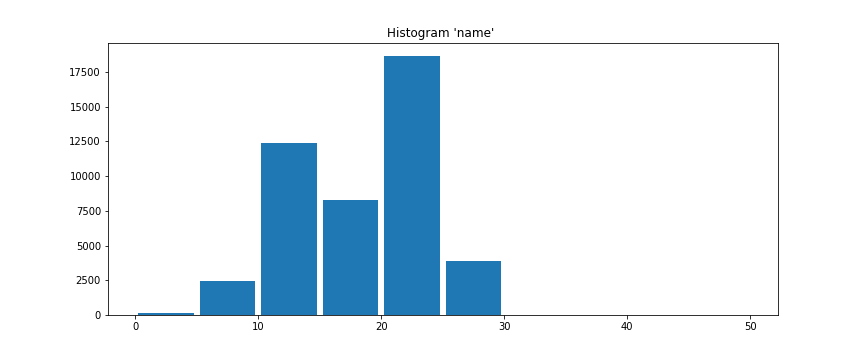
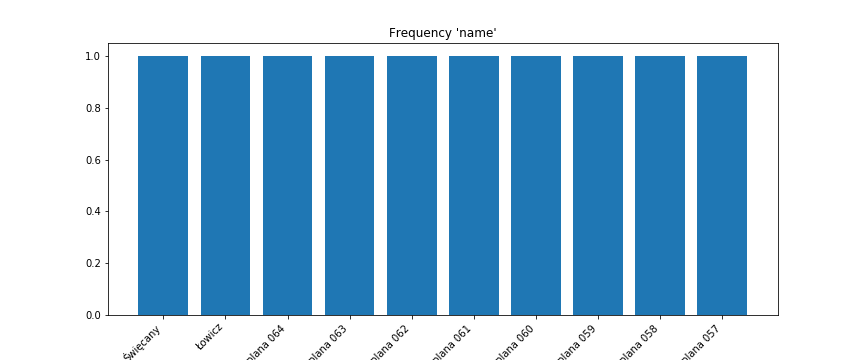
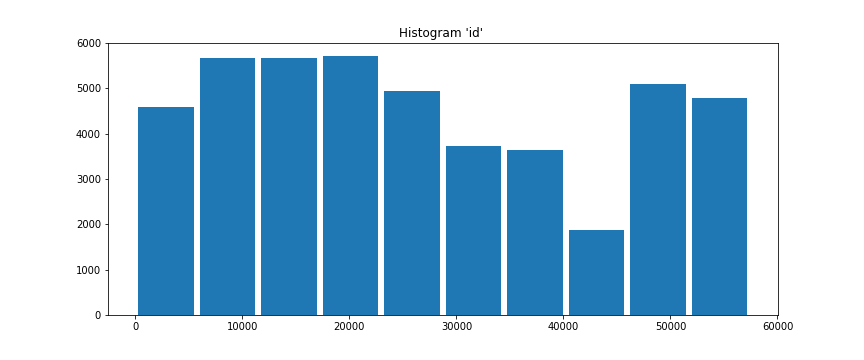
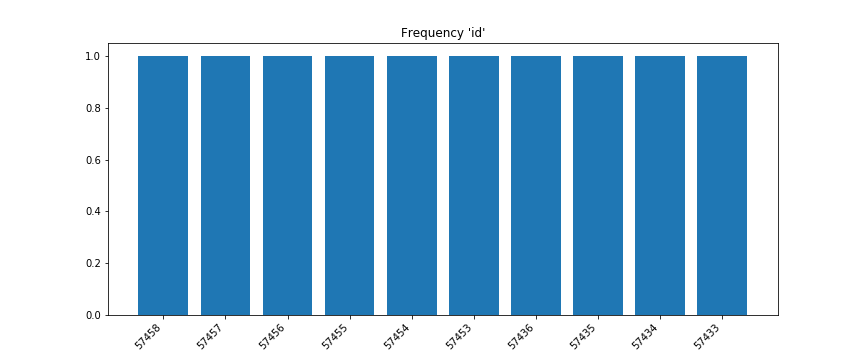
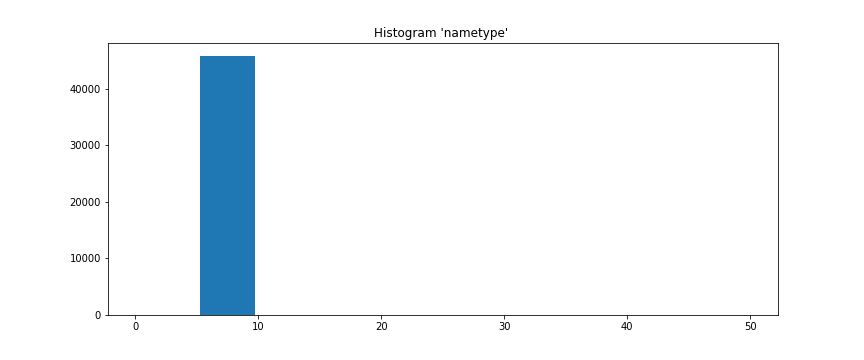
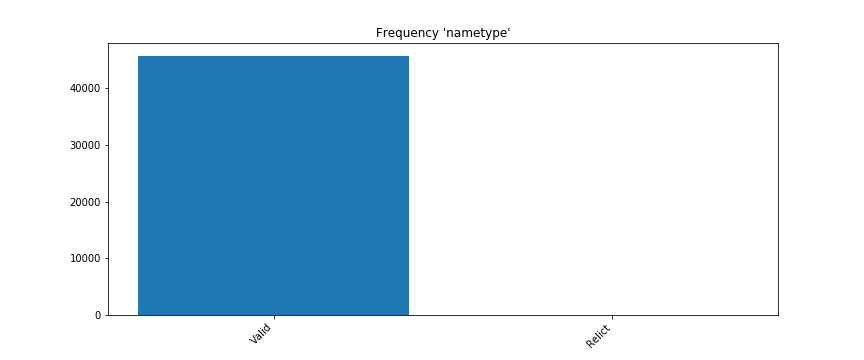
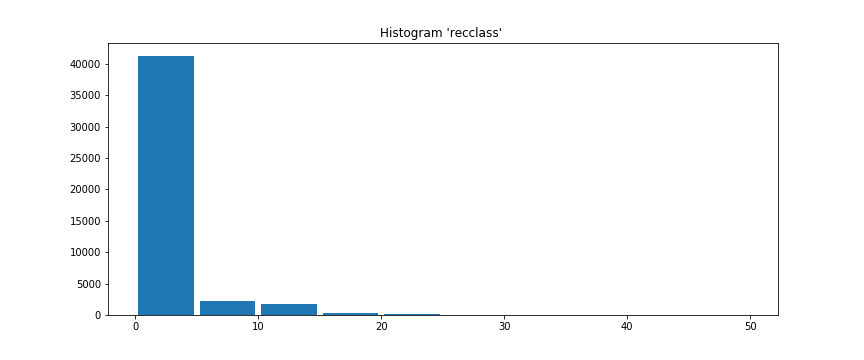
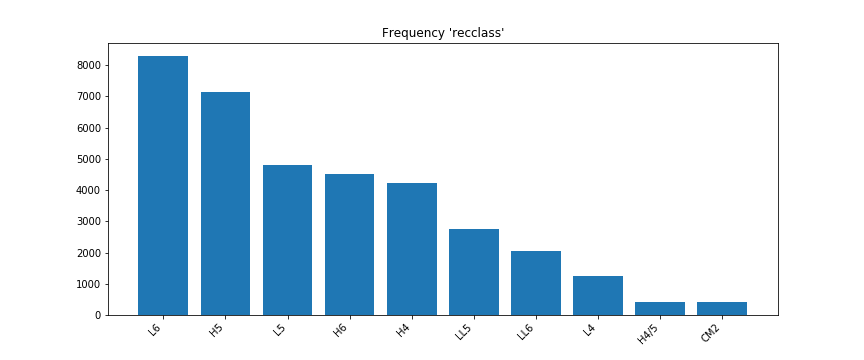
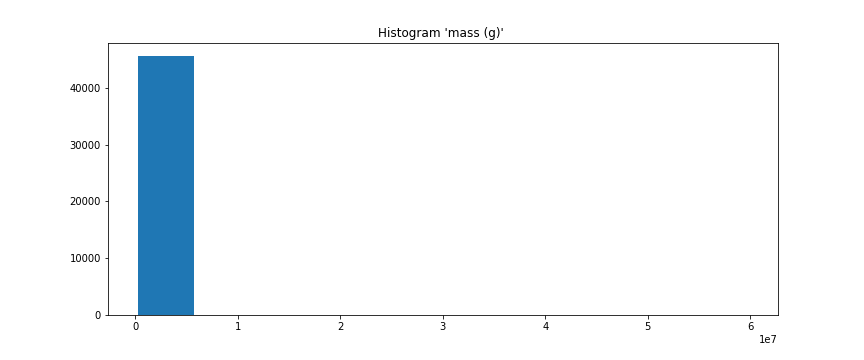
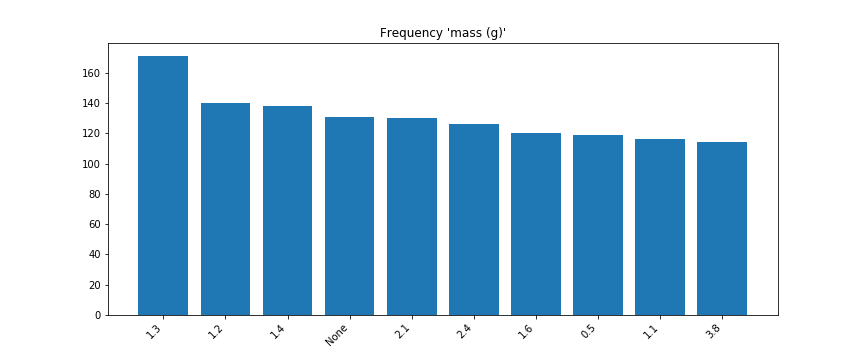
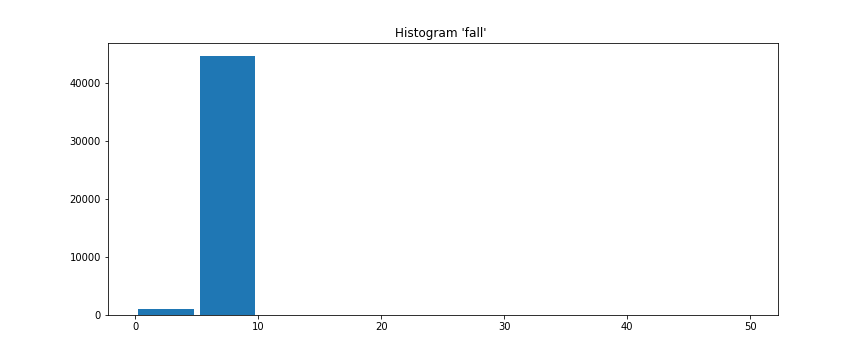
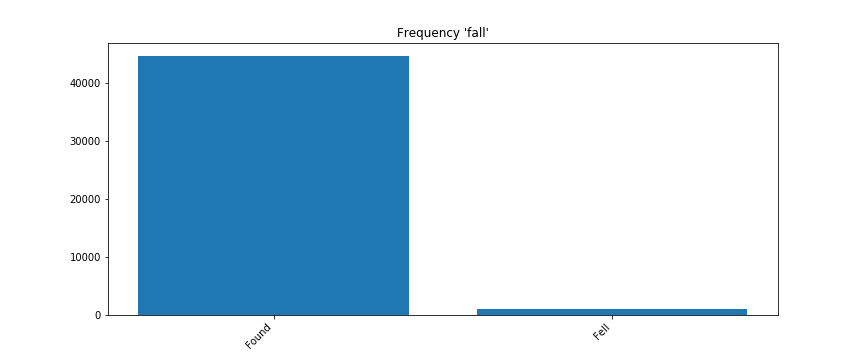
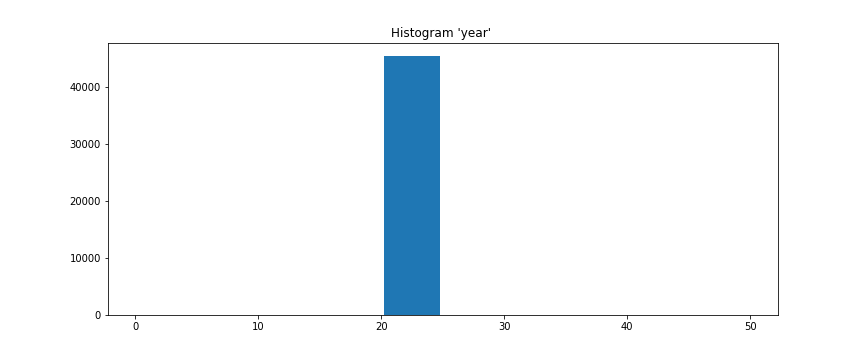
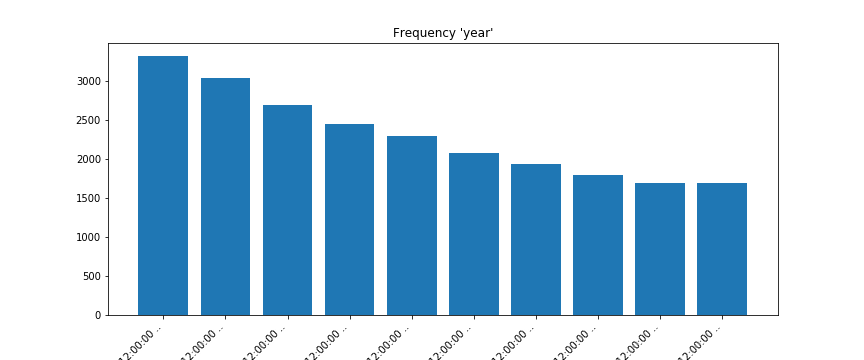
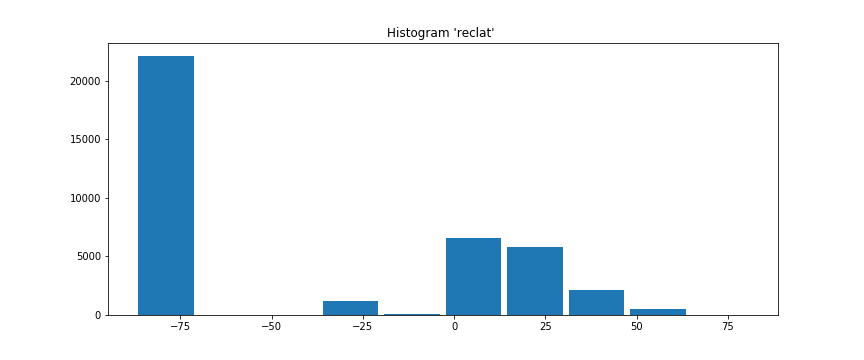
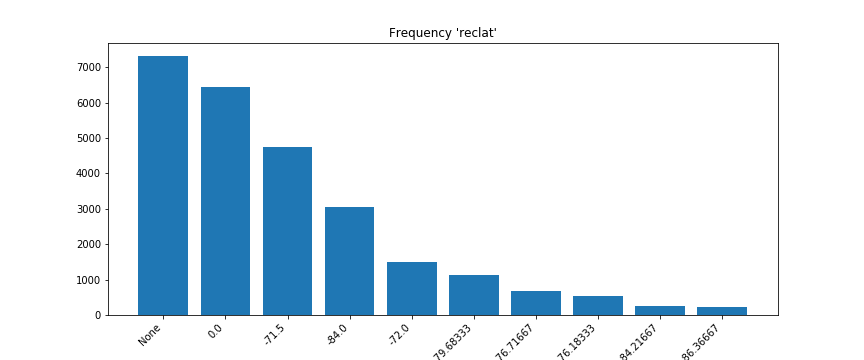
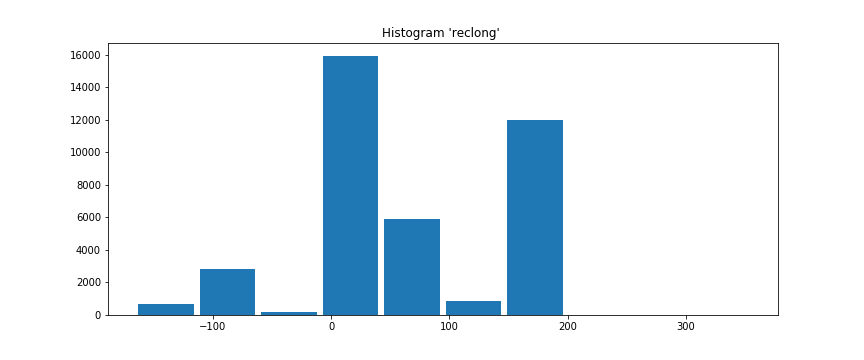
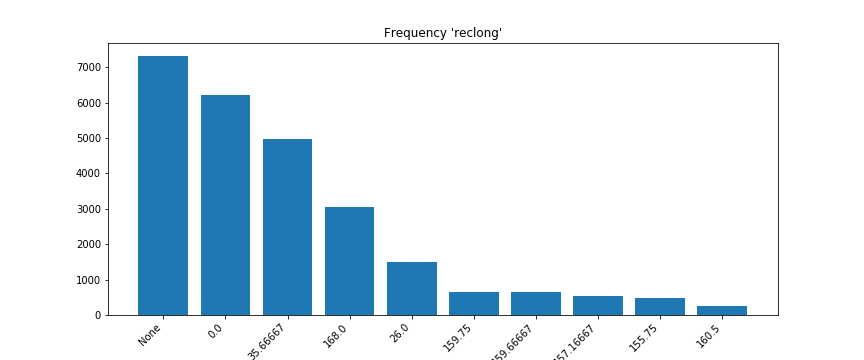
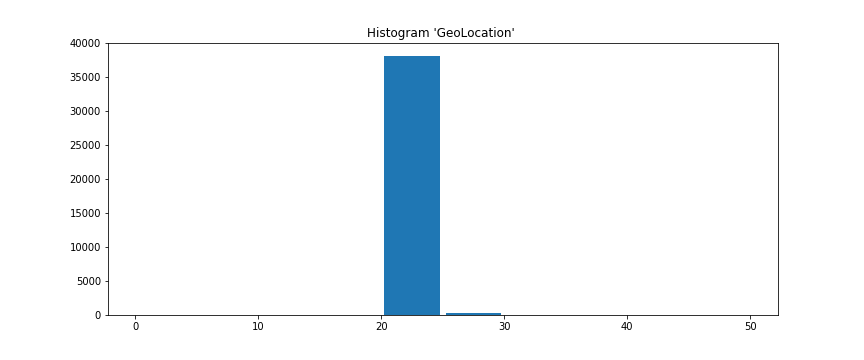
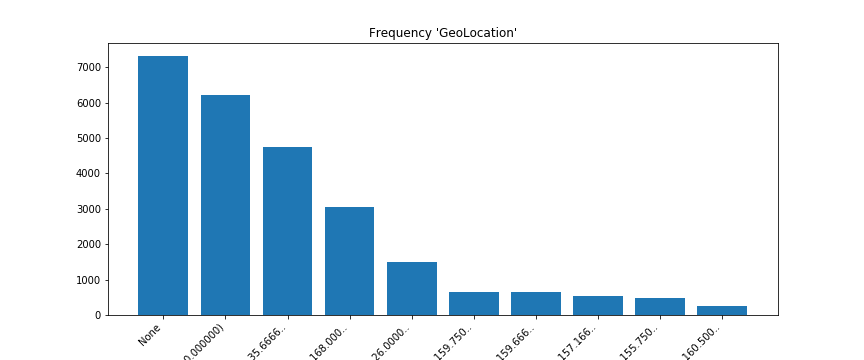

INFO:optimus:run() executed in 42.19 sec


Wall time: 42.2 s


In [11]:
%%time
from optimus.profiler.profiler import Profiler
p = Profiler()
r = p.run(df, "*")

In [99]:
from pyspark.sql import functions as F
df.cols.count_na("*")

*
Including 'nan' as Null in processing string type column'name'
Including 'nan' as Null in processing string type column'nametype'
Including 'nan' as Null in processing string type column'recclass'
Including 'nan' as Null in processing string type column'fall'
Including 'nan' as Null in processing string type column'year'
Including 'nan' as Null in processing string type column'GeoLocation'


{'name': 0,
 'id': 0,
 'nametype': 0,
 'recclass': 0,
 'mass (g)': 131,
 'fall': 0,
 'year': 288,
 'reclat': 7315,
 'reclong': 7315,
 'GeoLocation': 7315}

In [72]:

    
def a(b, *c):
    x (b,*c)

def x(y,*z):
    print(y,*z)
    
a(1,2,3,4)

1 2 3 4


In [81]:
df.cols.percentile("reclat",[0.1,0.5,1])

reclat
Column<b'map(0.1, percentile_approx(reclat, array(0.1, 0.5, 1), 10000)[0], 0.5, percentile_approx(reclat, array(0.1, 0.5, 1), 10000)[1], 1, percentile_approx(reclat, array(0.1, 0.5, 1), 10000)[2])'>


Py4JJavaError: An error occurred while calling o9415.agg.
: java.lang.ClassCastException: java.util.HashMap cannot be cast to java.lang.String
	at org.apache.spark.sql.RelationalGroupedDataset$$anonfun$agg$2.apply(RelationalGroupedDataset.scala:171)
	at org.apache.spark.sql.RelationalGroupedDataset$$anonfun$agg$2.apply(RelationalGroupedDataset.scala:171)
	at scala.collection.TraversableLike$$anonfun$map$1.apply(TraversableLike.scala:234)
	at scala.collection.TraversableLike$$anonfun$map$1.apply(TraversableLike.scala:234)
	at scala.collection.immutable.Map$Map1.foreach(Map.scala:116)
	at scala.collection.TraversableLike$class.map(TraversableLike.scala:234)
	at scala.collection.AbstractTraversable.map(Traversable.scala:104)
	at org.apache.spark.sql.RelationalGroupedDataset.agg(RelationalGroupedDataset.scala:171)
	at org.apache.spark.sql.RelationalGroupedDataset.agg(RelationalGroupedDataset.scala:190)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [137]:
df.cols.hist("id",10)

[Column<b'array(map(count, sum(CASE WHEN ((id >= 1) AND (id < 5746.7)) THEN 1 ELSE 0 END), lower, 1, upper, 5746.7) AS `hist_agg_id_0`, map(count, sum(CASE WHEN ((id >= 5746.7) AND (id < 11492.4)) THEN 1 ELSE 0 END), lower, 5746.7, upper, 11492.4) AS `hist_agg_id_1`, map(count, sum(CASE WHEN ((id >= 11492.4) AND (id < 17238.1)) THEN 1 ELSE 0 END), lower, 11492.4, upper, 17238.1) AS `hist_agg_id_2`, map(count, sum(CASE WHEN ((id >= 17238.1) AND (id < 22983.8)) THEN 1 ELSE 0 END), lower, 17238.1, upper, 22983.8) AS `hist_agg_id_3`, map(count, sum(CASE WHEN ((id >= 22983.8) AND (id < 28729.5)) THEN 1 ELSE 0 END), lower, 22983.8, upper, 28729.5) AS `hist_agg_id_4`, map(count, sum(CASE WHEN ((id >= 28729.5) AND (id < 34475.2)) THEN 1 ELSE 0 END), lower, 28729.5, upper, 34475.2) AS `hist_agg_id_5`, map(count, sum(CASE WHEN ((id >= 34475.2) AND (id < 40220.9)) THEN 1 ELSE 0 END), lower, 34475.2, upper, 40220.9) AS `hist_agg_id_6`, map(count, sum(CASE WHEN ((id >= 40220.9) AND (id < 45966.6)) 

INFO:optimus:hist() executed in 3.0 sec


[{'count': 4589.0, 'lower': 1.0, 'upper': 5746.7},
 {'count': 5681.0, 'lower': 5746.7, 'upper': 11492.4},
 {'count': 5660.0, 'lower': 11492.4, 'upper': 17238.1},
 {'count': 5712.0, 'lower': 17238.1, 'upper': 22983.8},
 {'count': 4932.0, 'lower': 22983.8, 'upper': 28729.5},
 {'count': 3738.0, 'lower': 28729.5, 'upper': 34475.2},
 {'count': 3646.0, 'lower': 34475.2, 'upper': 40220.9},
 {'count': 1878.0, 'lower': 40220.9, 'upper': 45966.6},
 {'count': 5097.0, 'lower': 45966.6, 'upper': 51712.3},
 {'count': 4782.0, 'lower': 51712.3, 'upper': 57458.0}]

In [90]:
df.cols.percentile("id",[0.1,0.2,0.3],1)

Column<b'map(0.1, percentile_approx(id, array(0.1, 0.2, 0.3), 1)[0], 0.2, percentile_approx(id, array(0.1, 0.2, 0.3), 1)[1], 0.3, percentile_approx(id, array(0.1, 0.2, 0.3), 1)[2])'>
[Column<b'map(0.1, percentile_approx(id, array(0.1, 0.2, 0.3), 1)[0], 0.2, percentile_approx(id, array(0.1, 0.2, 0.3), 1)[1], 0.3, percentile_approx(id, array(0.1, 0.2, 0.3), 1)[2]) AS `percentile_agg_id`'>]


INFO:optimus:percentile() executed in 1.33 sec


{'percentile_agg': {'0.2': 1, '0.3': 1, '0.1': 1}}

In [43]:
from pyspark.sql import DataFrameStatFunctions as SF
# SF.approxQuantile( "Salary", [0.5], 0.25)
from pyspark.sql import functions as F

print(F.expr("percentile_approx(id, array(.25, .5, .75))"))

# SF.approxQuantile( "Salary", [0.5], 0.25)
# print(SF.percentile_approx(F.lit(1)))

df.select(F.expr("(percentile_approx(id, array(.25, .5, .75), 10),percentile_approx(id, array(.25, .5, .75))) ")).show()

Column<b'percentile_approx(id, array(0.25, 0.5, 0.75))'>
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|named_struct(col1, percentile_approx(id, array(CAST(0.25 AS DECIMAL(2,2)), CAST(0.5 AS DECIMAL(2,2)), CAST(0.75 AS DECIMAL(2,2))), 10), col2, percentile_approx(id, array(CAST(0.25 AS DECIMAL(2,2)), CAST(0.5 AS DECIMAL(2,2)), CAST(0.75 AS DECIMAL(2,2))), 10000))|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                      

In [54]:
df._name

[{'name': 'Dominion Range 08357',
  'id': 52132,
  'nametype': 'Valid',
  'recclass': 'L6',
  'mass (g)': 8.9,
  'fall': 'Found',
  'year': '01/01/2008 12:00:00 AM',
  'reclat': 0.0,
  'reclong': 0.0,
  'GeoLocation': '(0.000000, 0.000000)'},
 {'name': 'Yamato 792863',
  'id': 28212,
  'nametype': 'Valid',
  'recclass': 'H5',
  'mass (g)': 132.25,
  'fall': 'Found',
  'year': '01/01/1979 12:00:00 AM',
  'reclat': -71.5,
  'reclong': 35.66667,
  'GeoLocation': '(-71.500000, 35.666670)'},
 {'name': 'Acfer 232',
  'id': 240,
  'nametype': 'Valid',
  'recclass': 'H5',
  'mass (g)': 725.0,
  'fall': 'Found',
  'year': '01/01/1991 12:00:00 AM',
  'reclat': 27.73944,
  'reclong': 4.32833,
  'GeoLocation': '(27.739440, 4.328330)'},
 {'name': 'Jiddat al Harasis 755',
  'id': 56470,
  'nametype': 'Valid',
  'recclass': 'L5',
  'mass (g)': 17.5,
  'fall': 'Found',
  'year': None,
  'reclat': 19.83528,
  'reclong': 56.46139,
  'GeoLocation': '(19.835280, 56.461390)'},
 {'name': 'Imlay',
  'id': 52

In [45]:
from pyspark.sql import functions as F
from itertools import product

def a(funcs, columns):
    return [(x,y) for x,y in product(funcs, columns)]
        
a([F.min, F.max, F.mean], ["name","id"])

[(<function pyspark.sql.functions._create_function.<locals>._(col)>, 'name'),
 (<function pyspark.sql.functions._create_function.<locals>._(col)>, 'id'),
 (<function pyspark.sql.functions._create_function.<locals>._(col)>, 'name'),
 (<function pyspark.sql.functions._create_function.<locals>._(col)>, 'id'),
 (<function pyspark.sql.functions._create_function.<locals>._(col)>, 'name'),
 (<function pyspark.sql.functions._create_function.<locals>._(col)>, 'id')]

In [8]:
df.select("id").send()

AttributeError: type object 'Profiler' has no attribute 'instance'

In [129]:
def a(ar):
    self.hola = 1
a.hola

AttributeError: 'function' object has no attribute 'hola'

In [121]:
df.cols.count_na("id")

{'name': 0,
 'id': 0,
 'nametype': 0,
 'recclass': 0,
 'mass (g)': 0,
 'fall': 0,
 'year': 0,
 'reclat': 0,
 'reclong': 0,
 'GeoLocation': 0}

In [7]:
df.table()

name 1 (string) nullable,id 2 (int) nullable,nametype 3 (string) nullable,recclass 4 (string) nullable,mass (g) 5 (double) nullable,fall 6 (string) nullable,year 7 (string) nullable,reclat 8 (double) nullable,reclong 9 (double) nullable,GeoLocation 10 (string) nullable
Dominion⋅Range⋅08357,52132,Valid,L6,8.9,Found,01/01/2008⋅12:00:00⋅AM,0.0,0.0,"(0.000000,⋅0.000000)"
Yamato⋅792863,28212,Valid,H5,132.25,Found,01/01/1979⋅12:00:00⋅AM,-71.5,35.66667,"(-71.500000,⋅35.666670)"
Acfer⋅232,240,Valid,H5,725.0,Found,01/01/1991⋅12:00:00⋅AM,27.73944,4.32833,"(27.739440,⋅4.328330)"
Jiddat⋅al⋅Harasis⋅755,56470,Valid,L5,17.5,Found,None,19.83528,56.46139,"(19.835280,⋅56.461390)"
Imlay,52855,Valid,L5,770.0,Found,01/01/2009⋅12:00:00⋅AM,40.74018,-118.17285,"(40.740180,⋅-118.172850)"
Shişr⋅029,23564,Valid,H5,204.71,Found,01/01/1998⋅12:00:00⋅AM,18.1501,53.80047,"(18.150100,⋅53.800470)"
Northwest⋅Africa⋅3148,31272,Valid,Eucrite,138.0,Found,01/01/2004⋅12:00:00⋅AM,None,None,None
Dhofar⋅1462,55271,Valid,L~4,400.8,Found,01/01/2008⋅12:00:00⋅AM,18.34955,54.25013,"(18.349550,⋅54.250130)"
Dhofar⋅085,6784,Valid,H4,78.0,Found,01/01/1999⋅12:00:00⋅AM,19.21233,54.8475,"(19.212330,⋅54.847500)"
Grove⋅Mountains⋅053621,50563,Valid,L6,1.8,Found,01/01/2006⋅12:00:00⋅AM,-72.78194,75.30056,"(-72.781940,⋅75.300560)"


In [10]:
%%time
df.cols.frequency("fall")

Wall time: 2.78 s


{'fall': [{'value': 'Found', 'count': 44609},
  {'value': 'Fell', 'count': 1107}]}

In [13]:
%%time
df.table_name("aaa")
query = []
columns = ["fall"]
for c in columns:
    query.append("`{COL_NAME}`, count(*) over (partition BY `{COL_NAME}`) as `c_{COL_NAME}`".format(COL_NAME=c))
query = "SELECT " + ",".join(query) + " FROM aaa"
print(query)

p= df.query(query)
p.show()


SELECT `fall`, count(*) over (partition BY `fall`) as `c_fall` FROM aaa
+----+------+
|fall|c_fall|
+----+------+
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
|Fell|  1107|
+----+------+
only showing top 20 rows

Wall time: 1.16 s


In [235]:
%%time
p.table()

name 1 (string) nullable,c_name 2 (bigint) not nullable,id 3 (int) nullable,c_id 4 (bigint) not nullable,nametype 5 (string) nullable,c_nametype 6 (bigint) not nullable,recclass 7 (string) nullable,c_recclass 8 (bigint) not nullable,mass (g) 9 (double) nullable,c_mass (g) 10 (bigint) not nullable,fall 11 (string) nullable,c_fall 12 (bigint) not nullable,year 13 (string) nullable,c_year 14 (bigint) not nullable,reclat 15 (double) nullable,c_reclat 16 (bigint) not nullable,reclong 17 (double) nullable,c_reclong 18 (bigint) not nullable,GeoLocation 19 (string) nullable,c_GeoLocation 20 (bigint) not nullable
Grove⋅Mountains⋅022595,1,47999,1,Valid,45641,H4,4211,0.66,19,Found,44609,01/01/2003⋅12:00:00⋅AM,3323,-72.7825,39,75.279167,1,"(-72.782500,⋅75.279167)",1
Yamato⋅86590,1,30096,1,Valid,45641,H4,4211,0.66,19,Found,44609,01/01/1986⋅12:00:00⋅AM,1375,-71.5,4761,35.66667,4985,"(-71.500000,⋅35.666670)",4761
Grove⋅Mountains⋅022198,1,47919,1,Valid,45641,L6,8285,0.66,19,Found,44609,01/01/2003⋅12:00:00⋅AM,3323,-72.781389,8,75.305556,3,"(-72.781389,⋅75.305556)",2
Grove⋅Mountains⋅022758,1,48015,1,Valid,45641,H6,4528,0.66,19,Found,44609,01/01/2003⋅12:00:00⋅AM,3323,-72.777778,11,75.279444,4,"(-72.777778,⋅75.279444)",1
Grove⋅Mountains⋅021769,1,49878,1,Valid,45641,CR2,135,0.66,19,Found,44609,01/01/2003⋅12:00:00⋅AM,3323,-72.7844,1,75.3094,1,"(-72.784400,⋅75.309400)",1
Frontier⋅Mountain⋅90199,1,10589,1,Valid,45641,H4,4211,0.66,19,Found,44609,01/01/1990⋅12:00:00⋅AM,1518,-72.95591,1,160.54133,1,"(-72.955910,⋅160.541330)",1
Grove⋅Mountains⋅023784,1,48118,1,Valid,45641,L5,4796,0.66,19,Found,44609,01/01/2003⋅12:00:00⋅AM,3323,-72.984722,4,75.249444,5,"(-72.984722,⋅75.249444)",1
Yamato⋅8413,1,29460,1,Valid,45641,Eucrite,221,0.66,19,Found,44609,01/01/1984⋅12:00:00⋅AM,402,-71.5,4761,35.66667,4985,"(-71.500000,⋅35.666670)",4761
Grove⋅Mountains⋅022793,1,48020,1,Valid,45641,LL6,2043,0.66,19,Found,44609,01/01/2003⋅12:00:00⋅AM,3323,-72.775556,11,75.338611,7,"(-72.775556,⋅75.338611)",2
Yamato⋅86557,1,30063,1,Valid,45641,H4,4211,0.66,19,Found,44609,01/01/1986⋅12:00:00⋅AM,1375,-71.5,4761,35.66667,4985,"(-71.500000,⋅35.666670)",4761


Wall time: 14min 29s


In [244]:
import numpy as np
print(pdf)
count,division = np.histogram(pdf['function'])

           names  c_names  height(ft)  c_height(ft)          function  \
0              1        1         2.0             1                 3   
1  Metroplex_)^$        1       300.0             1    Battle Station   
2   bumbl#ebéé          1        17.0             1         Espionage   
3       Optim'us        1        28.0             1            Leader   
4       Megatron        1         NaN             1              None   
5           Jazz        1        13.0             1  First Lieutenant   
6      ironhide&        1        26.0             1          Security   

   c_function  rank  c_rank      age  c_age  ...    DateType  c_DateType  \
0           1     4       1        5      1  ...  2011-04-10           2   
1           1     8       2  5000000      6  ...  2011-04-10           2   
2           1     7       2  5000000      6  ...  2015-08-10           1   
3           1    10       2  5000000      6  ...  2016-09-10           1   
4           1    10       2  500000

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [232]:
#Process columns one by one

%%time
df.cols.frequency("name",40)
df.cols.frequency("id",40)
df.cols.frequency("nametype",40)
df.cols.frequency("recclass",40)
df.cols.frequency("mass (g)",40)
df.cols.frequency("fall",40)
df.cols.frequency("year",40)
df.cols.frequency("reclat",40)
df.cols.frequency("reclong",40)
df.cols.frequency("GeoLocation",40)



Wall time: 1min 27s


In [233]:
# Process all the columns
%%time
df.cols.frequency('*',40)

Wall time: 1min 28s


{'name': [{'value': 'Święcany', 'count': 1},
  {'value': 'Łowicz', 'count': 1},
  {'value': 'Österplana 064', 'count': 1},
  {'value': 'Österplana 063', 'count': 1},
  {'value': 'Österplana 062', 'count': 1},
  {'value': 'Österplana 061', 'count': 1},
  {'value': 'Österplana 060', 'count': 1},
  {'value': 'Österplana 059', 'count': 1},
  {'value': 'Österplana 058', 'count': 1},
  {'value': 'Österplana 057', 'count': 1},
  {'value': 'Österplana 056', 'count': 1},
  {'value': 'Österplana 055', 'count': 1},
  {'value': 'Österplana 054', 'count': 1},
  {'value': 'Österplana 053', 'count': 1},
  {'value': 'Österplana 052', 'count': 1},
  {'value': 'Österplana 051', 'count': 1},
  {'value': 'Österplana 050', 'count': 1},
  {'value': 'Österplana 049', 'count': 1},
  {'value': 'Österplana 048', 'count': 1},
  {'value': 'Österplana 047', 'count': 1},
  {'value': 'Österplana 046', 'count': 1},
  {'value': 'Österplana 045', 'count': 1},
  {'value': 'Österplana 044', 'count': 1},
  {'value': 'Öste

In [220]:
%%time
# p= df.query("SELECT * FROM (SELECT `fall`, count(*) over (partition BY `fall`) as `c_fall` FROM aaa) ORDER BY `c_fall` DESC LIMIT 10")
p= df.query("SELECT `fall`, count(*) over (partition BY `fall`) as `c_fall` FROM aaa")

p.table()

fall 1 (string) nullable,c_fall 2 (bigint) not nullable
Fell,1107
Fell,1107
Fell,1107
Fell,1107
Fell,1107
Fell,1107
Fell,1107
Fell,1107
Fell,1107
Fell,1107


Wall time: 1.91 s


In [170]:
p.table()

names 1 (string) nullable,c_names 2 (bigint) not nullable,height(ft) 3 (int) nullable,c_height(ft) 4 (bigint) not nullable,function 5 (string) nullable,c_function 6 (bigint) not nullable,rank 7 (int) nullable,c_rank 8 (bigint) not nullable,age 9 (int) nullable,c_age 10 (bigint) not nullable,weight(t) 11 (float) nullable,c_weight(t) 12 (bigint) not nullable,japanese name 13 (array<string>) nullable,c_japanese name 14 (bigint) not nullable,last position seen 15 (string) nullable,c_last position seen 16 (bigint) not nullable,date arrival 17 (string) nullable,c_date arrival 18 (bigint) not nullable,last date seen 19 (string) nullable,c_last date seen 20 (bigint) not nullable,attributes 21 (array<float>) nullable,c_attributes 22 (bigint) not nullable,DateType 23 (date) nullable,c_DateType 24 (bigint) not nullable,Timestamp 25 (timestamp) nullable,c_Timestamp 26 (bigint) not nullable,Cybertronian 27 (boolean) nullable,c_Cybertronian 28 (bigint) not nullable,function(binary) 29 (binary) not nullable,c_function(binary) 30 (bigint) not nullable,NullType 31 (null) nullable,c_NullType 32 (bigint) not nullable
1,1,2,1,3,1,4,1,5,1,6.0,1,['7'],1,8,1,1980/04/10,7,2011/04/10,2,[11.0],1,2011-04-10,2,2014-06-24⋅00:00:00,7,True,7,bytearray(b'15'),1,None,7
Metroplex_)^$,1,300,1,Battle⋅Station,1,8,2,5000000,6,None,1,['Metroflex'],1,None,2,1980/04/10,7,2011/04/10,2,"[91.44000244140625,⋅None]",1,2011-04-10,2,2014-06-24⋅00:00:00,7,True,7,bytearray(b'Battle⋅Station'),1,None,7
bumbl#ebéé⋅⋅,1,17,1,Espionage,1,7,2,5000000,6,2.0,1,"['Bumble',⋅'Goldback']",1,"10.642707,-71.612534",1,1980/04/10,7,2015/08/10,1,"[5.334000110626221,⋅2000.0]",1,2015-08-10,1,2014-06-24⋅00:00:00,7,True,7,bytearray(b'Espionage'),1,None,7
Optim'us,1,28,1,Leader,1,10,2,5000000,6,4.300000190734863,1,"['Inochi',⋅'Convoy']",1,"19.442735,-99.201111",1,1980/04/10,7,2016/09/10,1,"[8.53439998626709,⋅4300.0]",1,2016-09-10,1,2014-06-24⋅00:00:00,7,True,7,bytearray(b'Leader'),1,None,7
Megatron,1,None,1,None,1,10,2,5000000,6,5.699999809265137,1,['Megatron'],1,None,2,1980/04/10,7,2012/05/10,1,"[None,⋅5700.0]",1,2012-05-10,1,2014-06-24⋅00:00:00,7,True,7,bytearray(b'None'),1,None,7
Jazz,1,13,1,First⋅Lieutenant,1,8,2,5000000,6,1.7999999523162842,1,['Meister'],1,"33.670666,-117.841553",1,1980/04/10,7,2013/06/10,1,"[3.962399959564209,⋅1800.0]",1,2013-06-24,1,2014-06-24⋅00:00:00,7,True,7,bytearray(b'First⋅Lieutenant'),1,None,7
ironhide&,1,26,1,Security,1,7,2,5000000,6,4.0,1,['Roadbuster'],1,"37.789563,-122.400356",1,1980/04/10,7,2014/07/10,1,"[7.924799919128418,⋅4000.0]",1,2014-06-24,1,2014-06-24⋅00:00:00,7,True,7,bytearray(b'Security'),1,None,7


In [169]:
pdf = p.toPandas()

In [161]:
# print(pdf)
# pdf=pdf.groupby(['names','c_names']).size()
for c in columns:    
    temp = pdf[[c,"c_"+c]].drop_duplicates()
    for index,row in temp.iterrows():
        print(row["names"], row["c_names"])

# for index, row in pdf.iterrows():
#     print(pdf["names"], pdf["c_names"])

1 1
Metroplex_)^$ 1
bumbl#ebéé   1
Optim'us 1
Megatron 1
Jazz 1
ironhide& 1


KeyError: 'names'

In [98]:
%%time
df.cols.frequency("*")

Wall time: 43 s


{'names': [{'value': 'ironhide&', 'count': 1},
  {'value': 'bumbl#ebéé  ', 'count': 1},
  {'value': "Optim'us", 'count': 1},
  {'value': 'Metroplex_)^$', 'count': 1},
  {'value': 'Megatron', 'count': 1},
  {'value': 'Jazz', 'count': 1},
  {'value': '1', 'count': 1}],
 'height(ft)': [{'value': 300, 'count': 1},
  {'value': 28, 'count': 1},
  {'value': 26, 'count': 1},
  {'value': 17, 'count': 1},
  {'value': 13, 'count': 1},
  {'value': 2, 'count': 1},
  {'value': None, 'count': 1}],
 'function': [{'value': 'Security', 'count': 1},
  {'value': 'None', 'count': 1},
  {'value': 'Leader', 'count': 1},
  {'value': 'First Lieutenant', 'count': 1},
  {'value': 'Espionage', 'count': 1},
  {'value': 'Battle Station', 'count': 1},
  {'value': '3', 'count': 1}],
 'rank': [{'value': 10, 'count': 2},
  {'value': 8, 'count': 2},
  {'value': 7, 'count': 2},
  {'value': 4, 'count': 1}],
 'age': [{'value': 5000000, 'count': 6}, {'value': 5, 'count': 1}],
 'weight(t)': [{'value': 6.0, 'count': 1},
  {'v

In [8]:
df.select("names").send()

INFO:optimus:Processing column 'names'...


Including 'nan' as Null in processing 'names'


INFO:optimus:_count_data_types() executed in 2.24 sec
INFO:optimus:count_data_types() executed in 2.25 sec
INFO:optimus:Using 'column_exp' to process column 'names' with function _cast_to
INFO:optimus:cast_columns() executed in 0.02 sec


'stddev' function in 'names' column is returning 'nan'. Is that what you expected?. Seems that 'names' has 'nan' values
'kurtosis' function in 'names' column is returning 'nan'. Is that what you expected?. Seems that 'names' has 'nan' values
'skewness' function in 'names' column is returning 'nan'. Is that what you expected?. Seems that 'names' has 'nan' values
'variance' function in 'names' column is returning 'nan'. Is that what you expected?. Seems that 'names' has 'nan' values


INFO:optimus:agg_exprs() executed in 1.15 sec
INFO:optimus:general_stats() executed in 1.16 sec
INFO:optimus:------------------------------
INFO:optimus:Processing column 'names'...
INFO:optimus:frequency() executed in 1.28 sec
INFO:optimus:stats_by_column() executed in 0.0 sec
INFO:optimus:Using 'column_exp' to process column 'names_len' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'names_len' with function _bucketizer
INFO:optimus:hist() executed in 1.49 sec
INFO:optimus:hist_string() executed in 3.66 sec


Including 'nan' as Null in processing 'names'


INFO:optimus:dataset_info() executed in 2.15 sec
INFO:optimus:Send to the queue


In [4]:
from optimus.bumblebee import Comm

C:\Users\argenisleon\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable

    You are using PySparkling of version 2.4.10, but your PySpark is of
    version 2.3.1. Please make sure Spark and PySparkling versions are compatible. 


In [22]:
c = Comm()
c.send({"a":1})

queue_exchange 
queue_routing_key f657036e-90b5-4391-8d48-fb3f16f6b8ae


In [10]:
new_df = df\
    .cols.lower(["names","function"])\
    .cols.date_transform("date arrival", "yyyy/MM/dd", "dd-MM-YYYY")\
    .cols.years_between("date arrival", "dd-MM-YYYY", output_cols = "from arrival")\
    .cols.remove_accents("names")\
    .cols.remove_special_chars("names")\
    .rows.drop(df["rank"]>8)\
    .cols.rename(str.lower)\
    .cols.trim("*")\
    .cols.unnest("japanese name", output_cols="other names")\
    .cols.unnest("last position seen",separator=",", output_cols="pos")\
    .cols.drop(["last position seen", "japanese name","date arrival", "cybertronian", "nulltype"])

INFO:optimus:Using 'column_exp' to process column 'names' with function _lower
INFO:optimus:Using 'column_exp' to process column 'function' with function _lower
INFO:optimus:Using 'column_exp' to process column 'date arrival' with function _date_transform
INFO:optimus:Using 'column_exp' to process column 'date arrival' with function _years_between
INFO:optimus:Using 'column_exp' to process column 'from arrival' with function _cast_to
INFO:optimus:Using 'pandas_udf' to process column 'names' with function _remove_accents
INFO:optimus:Using 'pandas_udf' to process column 'names' with function multiple_replace
INFO:optimus:`japanese name`,`attributes`,`timestamp`,`function(binary)`,`nulltype` column(s) was not processed because is/are not byte,short,big,int,double,float,string,date,bool
INFO:optimus:Using 'column_exp' to process column 'names' with function _trim
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _trim
INFO:optimus:Using 'column_exp' to process c

In [ ]:
df.select("names").send()

In [29]:
bb.df("transformers").table()

names 1 (string) nullable,height(ft) 2 (int) nullable,function 3 (string) nullable,rank 4 (int) nullable,age 5 (int) nullable,weight(t) 6 (float) nullable,japanese name 7 (array<string>) nullable,last position seen 8 (string) nullable,date arrival 9 (string) nullable,last date seen 10 (string) nullable,attributes 11 (array<float>) nullable,DateType 12 (date) nullable,Tiemstamp 13 (timestamp) nullable,Cybertronian 14 (boolean) nullable,function(binary) 15 (binary) not nullable,NullType 16 (null) nullable
Optim'us,28,Leader,10,5000000,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111",1980/04/10,2016/09/10,"[8.53439998626709,⋅4300.0]",2016-09-10,2014-06-24⋅00:00:00,True,bytearray(b'Leader'),None
bumbl#ebéé⋅⋅,17,Espionage,7,5000000,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534",1980/04/10,2015/08/10,"[5.334000110626221,⋅2000.0]",2015-08-10,2014-06-24⋅00:00:00,True,bytearray(b'Espionage'),None
ironhide&,26,Security,7,5000000,4.0,['Roadbuster'],"37.789563,-122.400356",1980/04/10,2014/07/10,"[7.924799919128418,⋅4000.0]",2014-06-24,2014-06-24⋅00:00:00,True,bytearray(b'Security'),None
Jazz,13,First⋅Lieutenant,8,5000000,1.7999999523162842,['Meister'],"33.670666,-117.841553",1980/04/10,2013/06/10,"[3.962399959564209,⋅1800.0]",2013-06-24,2014-06-24⋅00:00:00,True,bytearray(b'First⋅Lieutenant'),None
Megatron,None,None,10,5000000,5.699999809265137,['Megatron'],None,1980/04/10,2012/05/10,"[None,⋅5700.0]",2012-05-10,2014-06-24⋅00:00:00,True,bytearray(b'None'),None
Metroplex_)^$,300,Battle⋅Station,8,5000000,None,['Metroflex'],None,1980/04/10,2011/04/10,"[91.44000244140625,⋅None]",2011-04-10,2014-06-24⋅00:00:00,True,bytearray(b'Battle⋅Station'),None
1,2,3,4,5,6.0,['7'],8,1980/04/10,2011/04/10,[11.0],2011-04-10,2014-06-24⋅00:00:00,True,bytearray(b'15'),None


In [10]:
bb.dfs

{'transformers': DataFrame[names: string, height(ft): int, function: string, rank: int, age: int, weight(t): float, japanese name: array<string>, last position seen: string, date arrival: string, last date seen: string, attributes: array<float>, DateType: date, Tiemstamp: timestamp, Cybertronian: boolean, function(binary): binary, NullType: null]}

In [17]:
bb.drop("transformers")

'transformers' dataframe do not exist


In [246]:
import pandas as pd

from pyspark.sql.functions import col, pandas_udf, struct, PandasUDFType

pdf = pd.DataFrame([1, 2, 3], columns=["x"])
df = op.spark.createDataFrame(pdf)

# When the UDF is called with a single column that is not StructType,
# the input to the underlying function is an iterator of pd.Series.
@pandas_udf("long", PandasUDFType.SCALAR_ITER)
def plus_one(batch_iter):
    for x in batch_iter:
        yield x + 1

df.select(plus_one(col("x"))).show()


AttributeError: type object 'PandasUDFType' has no attribute 'SCALAR_ITER'

In [249]:
df.table()

x 1 (bigint) nullable
1
2
3


In [ ]:
df.cols.stratify("name")

In [ ]:
l
